In [2]:
import numpy as np
import nibabel as nib
import os
from nilearn import plotting
from nilearn import image
from nilearn import input_data
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### import data

*run info:*

In [93]:
#run_file = os.path.abspath('data/task01_run01.nii.gz')
run_file = os.path.join('/Users/kevinsitek/om/om/scratch/Fri/ksitek/timeseries/',
                        'voice978_task005_run001_emosent_dtype_mcf_mask_smooth_mask_gms_tempfilt_maths.nii.gz')
run_data = nib.load(run_file)

In [94]:
print(image.load_img(run_data).shape)

(108, 108, 65, 48)


In [95]:
one_time = image.index_img(run_data, 0)
print(one_time.shape)

(108, 108, 65)


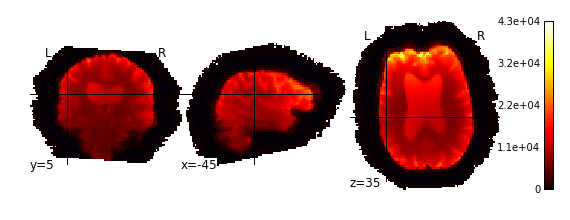

In [103]:
plotting.plot_stat_map(one_time,cut_coords=(-45,5,35),bg_img=None)

*condition info:*

In [54]:
# read in individual condition times:
cond001 = np.genfromtxt('data/onsets/run001/cond001.txt')
cond002 = np.genfromtxt('data/onsets/run001/cond002.txt')
cond003 = np.genfromtxt('data/onsets/run001/cond003.txt')

(12, 3)


array([[  25.135,    1.1  ,    1.   ],
       [  33.13 ,    1.1  ,    1.   ],
       [  49.121,    1.1  ,    1.   ],
       [  57.117,    1.1  ,    1.   ],
       [  89.098,    1.1  ,    1.   ],
       [ 101.091,    1.1  ,    1.   ],
       [ 105.089,    1.1  ,    1.   ],
       [ 125.078,    1.1  ,    1.   ],
       [ 149.064,    1.1  ,    1.   ],
       [ 169.053,    1.1  ,    1.   ],
       [ 177.048,    1.1  ,    1.   ],
       [ 181.046,    1.1  ,    1.   ]])

In [68]:
# combine individual conditions into one array:
run001_conds = np.zeros((36,4))
run001_conds[:12,:3] = cond001
run001_conds[:12,3] = 1

run001_conds[12:24,:3] = cond002
run001_conds[12:24,3] = 2

run001_conds[24:36,:3] = cond003
run001_conds[24:36,3] = 3

In [75]:
# order the array:
run001_conds_ordered = run001_conds[run001_conds[:,0].argsort()]

In [78]:
# add 'rest' conditions to the array
# by fitting the ordered data into an array of zeros:
run001_cond_inc_rest = np.zeros((48))
run001_cond_inc_rest[((np.round(run001_conds_ordered[:,0])-1)/4).astype(int)] = run001_conds_ordered[:,3]

In [79]:
# how does it look:
run001_cond_inc_rest

array([ 2.,  2.,  3.,  0.,  3.,  3.,  1.,  2.,  1.,  2.,  2.,  2.,  1.,
        0.,  1.,  2.,  0.,  3.,  2.,  0.,  2.,  0.,  1.,  3.,  0.,  1.,
        1.,  3.,  3.,  0.,  3.,  1.,  0.,  3.,  3.,  0.,  2.,  1.,  0.,
        2.,  3.,  2.,  1.,  0.,  1.,  1.,  3.,  0.])

In [89]:
# now make a list of label words instead of number codes:
labels_run001 = []
for c in run001_cond_inc_rest:
    if c==0:
        labels_run001.append('rest')
    elif c==1:
        labels_run001.append('neutral')
    elif c==2:
        labels_run001.append('happy')
    elif c==3:
        labels_run001.append('sad')
labels_run001[:10]

['happy',
 'happy',
 'sad',
 'rest',
 'sad',
 'sad',
 'neutral',
 'happy',
 'neutral',
 'happy']

In [90]:
# now do it all for run 2:
cond001 = np.genfromtxt('data/onsets/run002/cond001.txt')
cond002 = np.genfromtxt('data/onsets/run002/cond002.txt')
cond003 = np.genfromtxt('data/onsets/run002/cond003.txt')

run002_conds = np.zeros((36,4))
run002_conds[:12,:3] = cond001
run002_conds[:12,3] = 1

run002_conds[12:24,:3] = cond002
run002_conds[12:24,3] = 2

run002_conds[24:36,:3] = cond003
run002_conds[24:36,3] = 3

run002_conds_ordered = run002_conds[run002_conds[:,0].argsort()]

run002_cond_inc_rest = np.zeros((48))
run002_cond_inc_rest[((np.round(run002_conds_ordered[:,0])-1)/4).astype(int)] = run002_conds_ordered[:,3]

labels_run002 = []
for c in run002_cond_inc_rest:
    if c==0:
        labels_run002.append('rest')
    elif c==1:
        labels_run002.append('neutral')
    elif c==2:
        labels_run002.append('happy')
    elif c==3:
        labels_run002.append('sad')
labels_run002[:10]

['neutral',
 'sad',
 'rest',
 'neutral',
 'happy',
 'happy',
 'rest',
 'sad',
 'happy',
 'happy']

In [92]:
np.savetxt('data/labels_run001.txt',run001_cond_inc_rest)
np.savetxt('data/labels_run002.txt',run002_cond_inc_rest)

** Realign the two run files to each other **

In [2]:
'''
from nipype.interfaces.nipy import SpaceTimeRealigner
#Run spatial realignment only
realigner = SpaceTimeRealigner()
realigner.inputs.in_file = ['/Users/kevinsitek/om/om/scratch/Fri/ksitek/timeseries/voice978_task005_run001_emosent_dtype_mcf_mask_smooth_mask_gms_tempfilt_maths.nii.gz',
                           '/Users/kevinsitek/om/om/scratch/Fri/ksitek/timeseries/voice978_task005_run002_emosent_dtype_mcf_mask_smooth_mask_gms_tempfilt_maths.nii.gz']
res = realigner.run() 
'''

/Users/kevinsitek/miniconda/lib/python2.7/site-packages/nipy/labs/glm/glm.py:9: FutureWarning: Module nipy.labs.utils.routines deprecated, will be removed
  from ..utils import mahalanobis
/Users/kevinsitek/miniconda/lib/python2.7/site-packages/nipype/interfaces/nipy/model.py:18: FutureWarning: Module nipy.labs.glm deprecated, will be removed. Please use nipy.modalities.fmri.glm instead.
  import nipy.labs.glm.glm as GLM
/Users/kevinsitek/miniconda/lib/python2.7/site-packages/nipy/io/files.py:145: FutureWarning: Default `strict` currently False; this will change to True in a future version of nipy
  ni_img = nipy2nifti(img, data_dtype = io_dtype)


In [4]:
run1_data = nib.load('data/corr_voice978_task005_run001.nii.gz')
run2_data = nib.load('data/corr_voice978_task005_run002.nii.gz')
one_time1 = image.index_img(run1_data, 0)
one_time2 = image.index_img(run2_data, 0)

In [10]:
run1_data.shape

(108, 108, 65, 48)

In [11]:
run2_data.shape

(108, 108, 65, 48)

In [24]:
x1 = run1_data.get_data()
x2 = run2_data.get_data()
print x1[0,0][0]
print x2[0,0][0]


[  9.06159110e-48  -9.84371181e-45   2.22958911e-49  -1.23032235e-44
  -3.93315112e-45   1.29573508e-48  -3.93224183e-44   4.94213521e-45
   2.71603775e-44  -2.63165651e-47  -9.93758854e-45  -9.92566949e-45
  -4.64268761e-45   4.98044866e-45  -4.95506662e-45  -9.83671189e-45
  -4.69323420e-45   6.78436379e-47   1.97707565e-44   4.98130661e-45
   4.95668058e-45  -1.98623415e-44   1.98603026e-44  -1.99025633e-44
  -9.89675529e-45  -1.98546595e-44   9.90385356e-45  -3.92807034e-44
  -2.44921472e-44  -9.82704255e-45  -9.06348769e-49   3.94101029e-44
   4.95046723e-45  -1.98438213e-44   1.97672030e-44   2.97310546e-44
  -9.74919064e-45  -2.48645574e-44  -9.93517666e-45  -9.76280751e-45
   2.95474647e-44  -3.57914904e-48   7.00973384e-51   9.91470217e-45
  -1.76388283e-47  -9.93849239e-45  -7.16389717e-45  -2.16350087e-47]
[ -1.97581322e-44  -3.92039440e-44   3.93167666e-44  -1.98051682e-44
  -5.93155824e-44  -3.91834142e-44   1.96401154e-44  -1.97440862e-44
  -1.97163112e-44  -1.97666657e-4

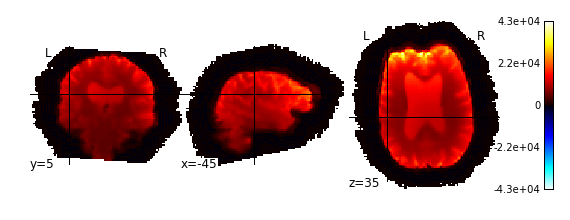

In [7]:
plotting.plot_stat_map(one_time1,cut_coords=(-45,5,35),bg_img=None)

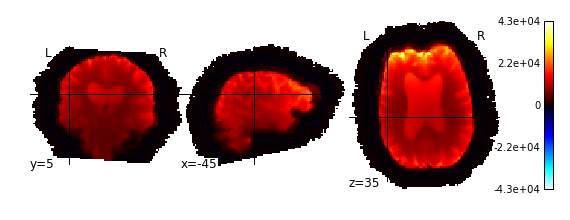

In [6]:
plotting.plot_stat_map(one_time2,cut_coords=(-45,5,35),bg_img=None)

** Run classifier **

From Yoel's classif_cond.py

In [10]:
import numpy as np
from nilearn import masking
from nilearn import image
from nilearn import input_data
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from nilearn.decoding import SpaceNetClassifier

# data
Xtrain = run1_data
Xtest = run2_data
ytrain = 'data/labels_run001.txt'
ytest = 'data/labels_run002.txt'

In [6]:
# attempt one, using approach straight from nilearn documentation
# first going to create an array to index the time points of the
# incoming data
idx_all_conditions = np.tile(True, 48)
X_train = image.index_img(Xtrain, idx_all_conditions)
X_test = image.index_img(Xtest, idx_all_conditions)
y_train1 = np.genfromtxt(ytrain, dtype=float)
y_test1 = np.genfromtxt(ytest, dtype=float)

# this creates the classifier
decoder = SpaceNetClassifier()
# this trains the classifier
decoder.fit(X_train, y_train1)
# get the prediction
prediction = decoder.predict(X_test)
# compute accuray
print("% Correct attempt one: {}".format((prediction == y_test1).mean()))


................................................................................................................................................................................................................................................................

Time Elapsed: 2051.39 seconds, 34 minutes.
% Correct attempt one: 0.333333333333


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed: 34.1min finished


In [ ]:
# attempt two, same approach but hopefully making it an easier
# classification problem, first index everything for the conditions
idx_1_0_ytrain = np.logical_or(y_train1 == 0, y_train1 == 1)
idx_1_0_ytest = np.logical_or(y_test1 == 0, y_test1 == 1)
X_train = image.index_img(Xtrain, idx_1_0_ytrain)
X_test = image.index_img(Xtest, idx_1_0_ytest)
y_train2 = y_train[idx_1_0_ytrain]
y_test2 = y_test[idx_1_0_ytest]

# apply a new classifier
decoder.fit(X_train, y_train2)
prediction = decoder.predict(X_test)
print("% Correct attempt two: {}".format((prediction == y_test2).mean()))




In [14]:
# attempt 3, sklearn and niftimasker, whole brain
masker = input_data.NiftiMasker(smoothing_fwhm = None,
    standardize = False, detrend = False, low_pass = None,
    high_pass = None, t_r = None)

idx_1_0_ytrain = np.logical_or(y_train1 == 0, y_train1 == 1)
idx_1_0_ytest = np.logical_or(y_test1 == 0, y_test1 == 1)
X_train = masker.fit_transform(Xtrain)[idx_1_0_ytrain, :]
X_test = masker.transform(Xtest)[idx_1_0_ytest, :]
y_train2 = y_train1[idx_1_0_ytrain]
y_test2 = y_test1[idx_1_0_ytest]
# we're using ytrain1 and ytest1

clf = Pipeline([('scale', StandardScaler()),
                ('lg', linear_model.LogisticRegression(
                            penalty = 'l1',
                            solver = 'liblinear'))])

clf.fit(X_train, y_train2)
prediction = clf.predict(X_test)
print("% Correct attempt three: {}".format((prediction == y_test2).mean()))

% Correct attempt three: 0.5


In [15]:
y_train1, y_test1

(array([ 2.,  2.,  3.,  0.,  3.,  3.,  1.,  2.,  1.,  2.,  2.,  2.,  1.,
         0.,  1.,  2.,  0.,  3.,  2.,  0.,  2.,  0.,  1.,  3.,  0.,  1.,
         1.,  3.,  3.,  0.,  3.,  1.,  0.,  3.,  3.,  0.,  2.,  1.,  0.,
         2.,  3.,  2.,  1.,  0.,  1.,  1.,  3.,  0.]),
 array([ 1.,  3.,  0.,  1.,  2.,  2.,  0.,  3.,  2.,  2.,  3.,  2.,  1.,
         3.,  0.,  3.,  3.,  3.,  0.,  3.,  1.,  0.,  1.,  2.,  0.,  2.,
         2.,  0.,  1.,  3.,  0.,  3.,  3.,  2.,  1.,  0.,  2.,  3.,  1.,
         0.,  1.,  2.,  1.,  0.,  2.,  1.,  1.,  0.]))